In [2]:
import os 
os.chdir

<function nt.chdir(path)>

In [6]:
os.getcwd()

'C:\\Users\\darshana\\OneDrive\\Project 1\\GOT'

In [7]:
# Importing modules
#!pip install pandas
import pandas as pd

# Reading in datasets/book1.csv
book1 = pd.read_csv("C:\\Users\\darshana\\OneDrive\\Project 1\\GOT\\datasets\\book1.csv")

# Printing out the head of the dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [9]:
# Importing modules
!pip install networkx
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph(data=None)

  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9


In [10]:
#checking the empty object's type
G_book1

In [12]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

<AxesSubplot:>

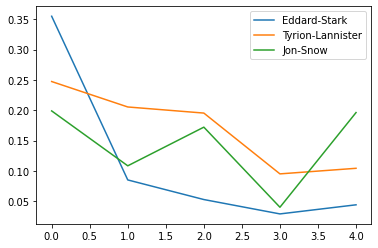

In [14]:
!pip install matplotlib
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

<AxesSubplot:>

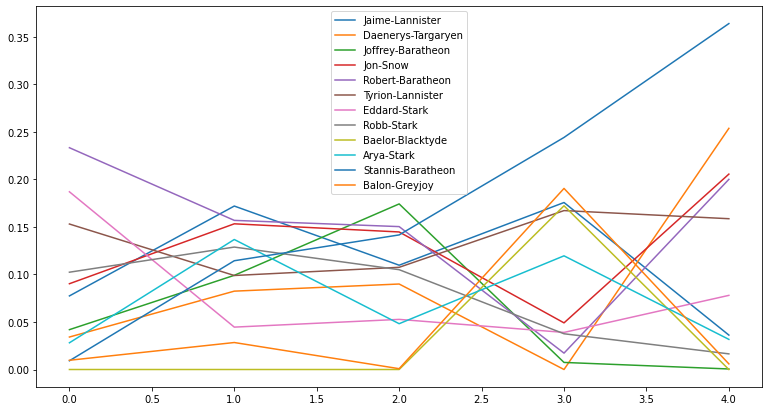

In [15]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol =  [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

<AxesSubplot:>

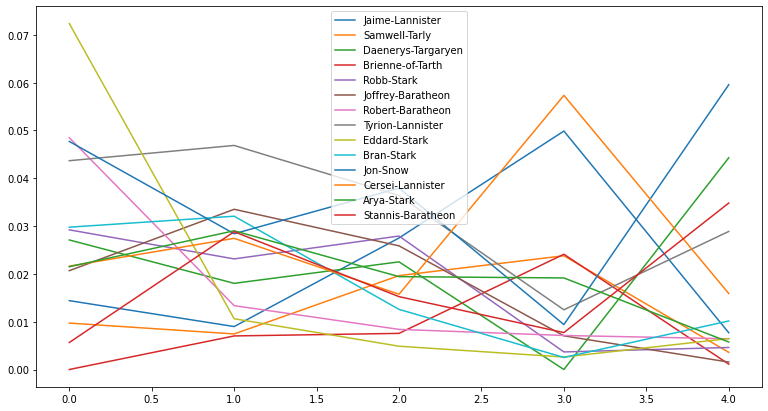

In [16]:
# Creating a list of pagerank of all the characters in all the books
evol =  [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

In [17]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [18]:
# Finding the most important character in the fifth book,
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank)
print(b_cent)
print(d_cent)

Jon-Snow
Stannis-Baratheon
Jon-Snow
